Correlation analyses:
    1. Between the metauncertainty parameters for each block of CPDM and the metauncertainty parameter for CRDM
    2. Between the metauncertainty parameters for each block of CPDM and the ambiguity aversion parameter
    3. Between the metauncertainty parameter in CRDM and the ambiguity aversion parameter

*DEFINITIONS*:

"mup" stands for meta-uncertainty parameter.

"aap" stands for ambuguity aversion parameter.

CPDM refers to our confidence and perceptual decision-making task.

CRDM refers to our confidence and risky decision-making task.

In [88]:
from glob import glob
import pandas as pd
import numpy as np
from os.path import join
import math
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

In [89]:
def compute_correlations(x, y):
    # Compute Pearson correlation
    pearson_r, pearson_p = pearsonr(x, y)
    pearson_r2 = pearson_r ** 2
    # Compute Spearman correlation
    spearman_r, spearman_p = spearmanr(x, y)
    spearman_r2 = spearman_r ** 2
    return {'Pearson': {'r': pearson_r, 'r^2': pearson_r2, 'p-value': pearson_p},
            'Spearman': {'r': spearman_r, 'r^2': spearman_r2, 'p-value': spearman_p}}

In [90]:
def plot_cpdm_vs_crdm(cpdm_var, crdm_var, ax):
    for i, block in enumerate(cpdm_var):
        x = crdm_var['meta_uncertainty']
        y = block['meta_uncertainty']
        ax[i//2, i%2].scatter(x, y)
        if (i>=2):
            ax[i//2, i%2].set_xlabel("CRDM Meta-Uncertainty")
        ax[i//2, i%2].set_ylabel("CPDM Block {} Meta-Uncertainty".format(i+1))
        m, b = np.polyfit(x, y, 1)
        ax[i//2, i%2].plot(x, m*x+b,"r-")
        corr = compute_correlations(x, y)
        ax[i//2, i%2].set_title(f"Pearson r: {corr['Pearson']['r']:.2f}, p-value: {corr['Pearson']['p-value']:.2e}\nSpearman r: {corr['Spearman']['r']:.2f}, p-value: {corr['Spearman']['p-value']:.2e}")

In [74]:
def plot_cpdm_vs_cdd(cpdm_var, cdd_var, ax):
    for i, block in enumerate(cpdm_var):
        x = cdd_var['meta_uncertainty']
        y = block['meta_uncertainty']
        ax[i//2, i%2].scatter(x, y)
        if (i>=2):
            ax[i//2, i%2].set_xlabel("CDD Meta-Uncertainty")
        ax[i//2, i%2].set_ylabel("CPDM Block {} Meta-Uncertainty".format(i+1))
        m, b = np.polyfit(x, y, 1)
        ax[i//2, i%2].plot(x, m*x+b,"r-")
        corr = compute_correlations(x, y)
        ax[i//2, i%2].set_title(f"Pearson r: {corr['Pearson']['r']:.2f}, p-value: {corr['Pearson']['p-value']:.2e}\nSpearman r: {corr['Spearman']['r']:.2f}, p-value: {corr['Spearman']['p-value']:.2e}")

In [91]:
#create all data frames
#batches 1 and 2
df_cdd_batch_1_2 = pd.read_csv("batch_1_2_cdd_metauncertainty_by_subject.csv")
df_crdm_batch_1_2 = pd.read_csv("batch_1_2_crdm_metauncertainty_by_subject.csv")
df_cpdm_b1_batch_1_2 = pd.read_csv("batch_1_2_cpdm_block_1_metauncertainty_by_subject.csv")
df_cpdm_b2_batch_1_2 = pd.read_csv("batch_1_2_cpdm_block_2_metauncertainty_by_subject.csv")
df_cpdm_b3_batch_1_2 = pd.read_csv("batch_1_2_cpdm_block_3_metauncertainty_by_subject.csv")
df_cpdm_b4_batch_1_2 = pd.read_csv("batch_1_2_cpdm_block_4_metauncertainty_by_subject.csv")
df_CRDM_analysis_batch_1_2 = pd.read_csv("batch_1_2_CRDM_analysis.csv")

#batch 3
df_cdd_batch_3 = pd.read_csv("batch_3_cdd_metauncertainty_by_subject.csv")
df_crdm_batch_3 = pd.read_csv("batch_3_crdm_metauncertainty_by_subject.csv")
df_cpdm_b1_batch_3 = pd.read_csv("batch_3_cpdm_block_1_metauncertainty_by_subject.csv")
df_cpdm_b2_batch_3 = pd.read_csv("batch_3_cpdm_block_2_metauncertainty_by_subject.csv")
df_cpdm_b3_batch_3 = pd.read_csv("batch_3_cpdm_block_3_metauncertainty_by_subject.csv")
df_cpdm_b4_batch_3 = pd.read_csv("batch_3_cpdm_block_4_metauncertainty_by_subject.csv")
df_CRDM_analysis_batch_3 = pd.read_csv("batch_3_CRDM_analysis.csv")

#batch 4
df_cdd_batch_4 = pd.read_csv("batch_4_cdd_metauncertainty_by_subject.csv")
df_crdm_batch_4 = pd.read_csv("batch_4_crdm_metauncertainty_by_subject.csv")
df_cpdm_b1_batch_4 = pd.read_csv("batch_4_cpdm_block_1_metauncertainty_by_subject.csv")
df_cpdm_b2_batch_4 = pd.read_csv("batch_4_cpdm_block_2_metauncertainty_by_subject.csv")
df_cpdm_b3_batch_4 = pd.read_csv("batch_4_cpdm_block_3_metauncertainty_by_subject.csv")
df_cpdm_b4_batch_4 = pd.read_csv("batch_4_cpdm_block_4_metauncertainty_by_subject.csv")
df_CRDM_analysis_batch_4 = pd.read_csv("batch_4_CRDM_analysis.csv")

In [92]:
#combine dfs
#cdd
frames = [df_cdd_batch_1_2, df_cdd_batch_3, df_cdd_batch_4]
df_cdd_batches = pd.concat(frames,ignore_index=True)
#print(df_cdd_batches)

#crdm
frames = [df_crdm_batch_1_2, df_crdm_batch_3, df_crdm_batch_4]
df_crdm_batches = pd.concat(frames,ignore_index=True)

#cpdm block 1
frames = [df_cpdm_b1_batch_1_2, df_cpdm_b1_batch_3, df_cpdm_b1_batch_4]
df_cpdm_b1_batches = pd.concat(frames,ignore_index=True)

#cpdm block 2
frames = [df_cpdm_b2_batch_1_2, df_cpdm_b2_batch_3, df_cpdm_b2_batch_4]
df_cpdm_b2_batches = pd.concat(frames,ignore_index=True)

#cpdm block 3
frames = [df_cpdm_b3_batch_1_2, df_cpdm_b3_batch_3, df_cpdm_b3_batch_4]
df_cpdm_b3_batches = pd.concat(frames,ignore_index=True)

#cpdm block 4
frames = [df_cpdm_b4_batch_1_2, df_cpdm_b4_batch_3, df_cpdm_b4_batch_4]
df_cpdm_b4_batches = pd.concat(frames,ignore_index=True)

#CRDM analyses (beta parameter)
frames = [df_CRDM_analysis_batch_1_2, df_CRDM_analysis_batch_3, df_CRDM_analysis_batch_4]
df_total_CRDM_analysis = pd.concat(frames,ignore_index=True)

2x2 subplot of each CPDM block 1-4 versus CRDM

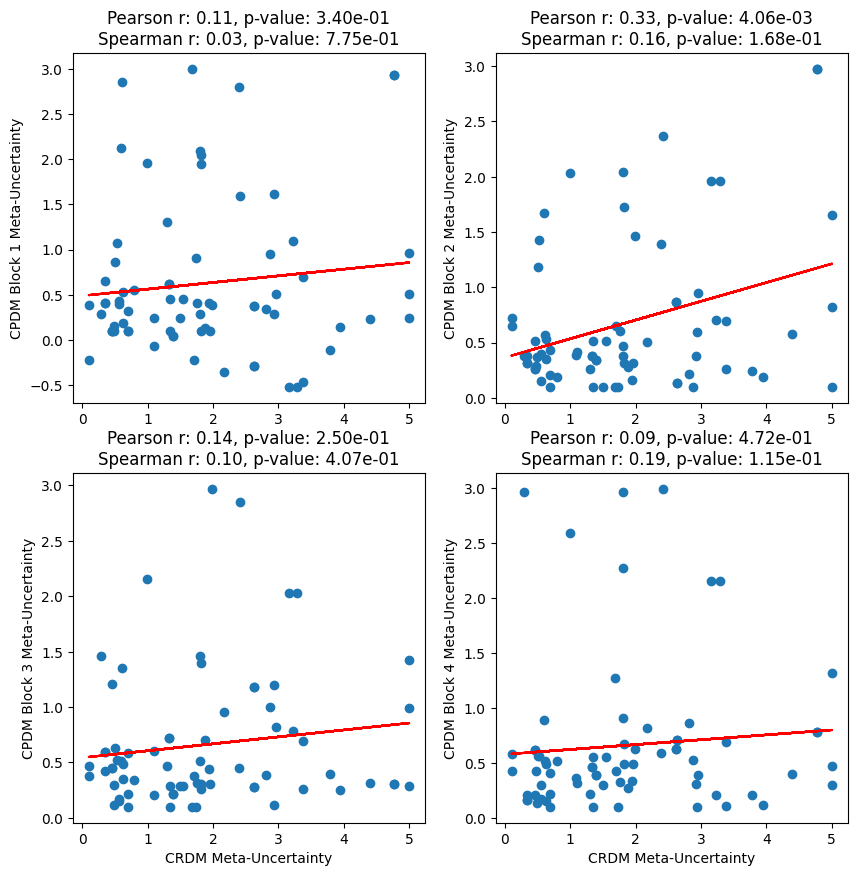

In [93]:
cpdm_var = [df_cpdm_b1_batches, df_cpdm_b2_batches, df_cpdm_b3_batches, df_cpdm_b4_batches]
crdm_var = df_crdm_batches
fig, ax = plt.subplots(2, 2,figsize=(10,10))
plot_cpdm_vs_crdm(cpdm_var,crdm_var,ax)

1x1 plot of the average across all blocks for CPDM versus CRDM

In [94]:
#print(df_cpdm_avg_batches)
df_cpdm_avg_batches = df_cpdm_b1_batches
df_cpdm_avg_batches = df_cpdm_avg_batches.rename(columns={'meta_uncertainty':'meta_1'})
#print(df_cpdm_avg_batches)
df_cpdm_avg_batches['meta_2'] = df_cpdm_b2_batches['meta_uncertainty']
df_cpdm_avg_batches['meta_3'] = df_cpdm_b3_batches['meta_uncertainty']
df_cpdm_avg_batches['meta_4'] = df_cpdm_b4_batches['meta_uncertainty']
#print(df_cpdm_avg_batches)

cols = ['meta_1','meta_2','meta_3','meta_4']
df_cpdm_avg_batches['meta_uncertainty'] = np.mean(df_cpdm_avg_batches[cols],axis=1)
df_cpdm_avg_batches.drop(columns = cols, inplace=True)
print(df_cpdm_avg_batches)

                           subject  meta_uncertainty
0   idm-v2_2023-01-25_12h21.15.616          1.224489
1   idm-v2_2023-01-25_14h56.19.594          2.184444
2   idm-v2_2023-01-25_15h10.30.241          0.453142
3   idm-v2_2023-01-25_15h38.04.746          0.302124
4   idm-v2_2023-01-25_16h45.56.883          0.696203
..                             ...               ...
68  idm-v2_2023-02-23_18h24.45.747          0.175320
69  idm-v2_2023-02-23_21h21.16.077          1.299360
70  idm-v2_2023-02-23_22h57.50.523          0.561585
71  idm-v2_2023-02-24_06h01.38.532          1.306725
72  idm-v2_2023-02-24_10h56.00.832          2.451143

[73 rows x 2 columns]


Text(0.5, 1.0, 'Pearson r: 0.23, p-value: 5.53e-02\nSpearman r: 0.19, p-value: 1.05e-01')

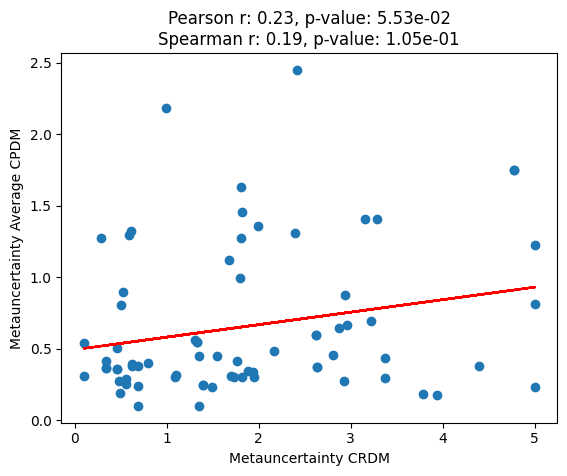

In [95]:
x = df_crdm_batches['meta_uncertainty']
y = df_cpdm_avg_batches['meta_uncertainty']
plt.scatter(x, y)
plt.xlabel("Metauncertainty CRDM")
plt.ylabel("Metauncertainty Average CPDM")
corr = compute_correlations(x, y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b,"r-")
plt.title(f"Pearson r: {corr['Pearson']['r']:.2f}, p-value: {corr['Pearson']['p-value']:.2e}\nSpearman r: {corr['Spearman']['r']:.2f}, p-value: {corr['Spearman']['p-value']:.2e}")

In [96]:
print(df_cpdm_b1_batches)
print(df_cpdm_b2_batches)
print(df_cpdm_b3_batches)
print(df_cpdm_b4_batches)

                           subject  meta_uncertainty
0   idm-v2_2023-01-25_12h21.15.616          0.506786
1   idm-v2_2023-01-25_14h56.19.594          1.961464
2   idm-v2_2023-01-25_15h10.30.241          0.339603
3   idm-v2_2023-01-25_15h38.04.746          0.907048
4   idm-v2_2023-01-25_16h45.56.883          1.090267
..                             ...               ...
68  idm-v2_2023-02-23_18h24.45.747          0.142833
69  idm-v2_2023-02-23_21h21.16.077          2.126070
70  idm-v2_2023-02-23_22h57.50.523          1.299606
71  idm-v2_2023-02-24_06h01.38.532          2.795078
72  idm-v2_2023-02-24_10h56.00.832          1.586980

[73 rows x 2 columns]
                           subject  meta_uncertainty
0   idm-v2_2023-01-25_12h21.15.616          1.651703
1   idm-v2_2023-01-25_14h56.19.594          2.030841
2   idm-v2_2023-01-25_15h10.30.241          0.219965
3   idm-v2_2023-01-25_15h38.04.746          0.100809
4   idm-v2_2023-01-25_16h45.56.883          0.703578
..                     

2x2 subplot of each CPDM block 1-4 versus CDD

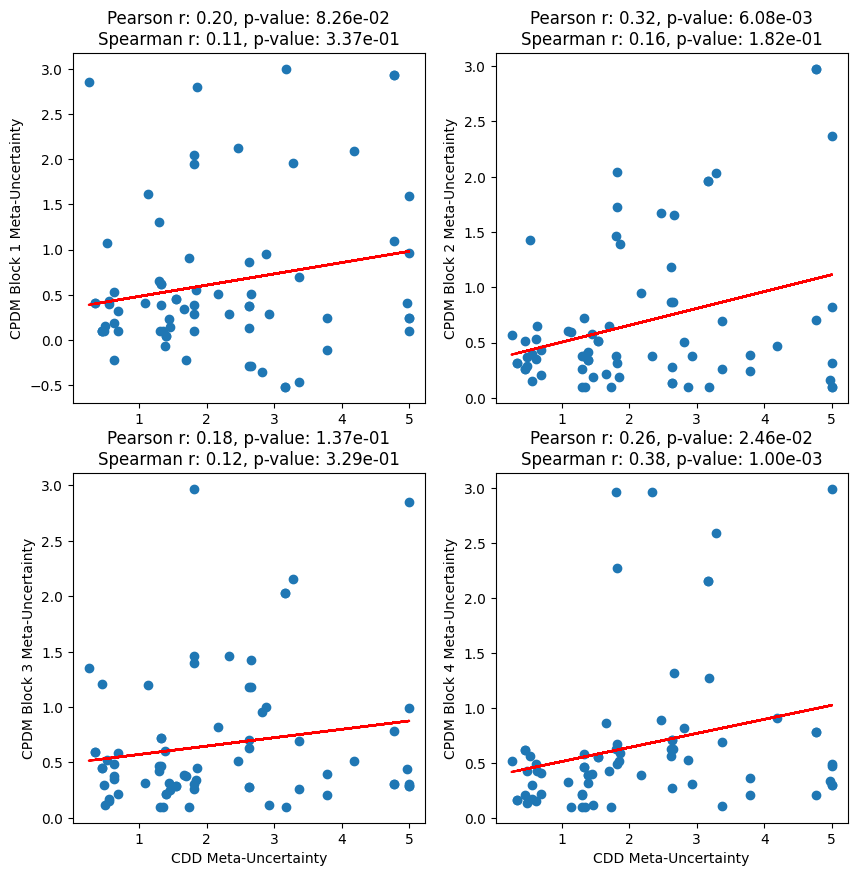

In [97]:
cpdm_var = [df_cpdm_b1_batches, df_cpdm_b2_batches, df_cpdm_b3_batches, df_cpdm_b4_batches]
cdd_var = df_cdd_batches
fig, ax = plt.subplots(2, 2,figsize=(10,10))
plot_cpdm_vs_cdd(cpdm_var,cdd_var,ax)

1x1 plot of the average across all blocks for CPDM versus CDD

Text(0.5, 1.0, 'Pearson r: 0.33, p-value: 4.41e-03\nSpearman r: 0.25, p-value: 3.11e-02')

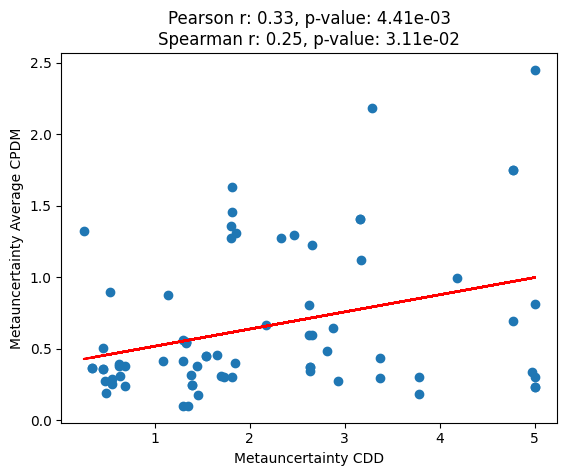

In [98]:
x = df_cdd_batches['meta_uncertainty']
y = df_cpdm_avg_batches['meta_uncertainty']
plt.scatter(x, y)
plt.xlabel("Metauncertainty CDD")
plt.ylabel("Metauncertainty Average CPDM")
corr = compute_correlations(x, y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b,"r-")
plt.title(f"Pearson r: {corr['Pearson']['r']:.2f}, p-value: {corr['Pearson']['p-value']:.2e}\nSpearman r: {corr['Spearman']['r']:.2f}, p-value: {corr['Spearman']['p-value']:.2e}")

1x1 plot of CRDM vs CDD Meta-Uncertainty

Text(0.5, 1.0, 'Pearson r: 0.64, p-value: 9.76e-10\nSpearman r: 0.71, p-value: 2.55e-12')

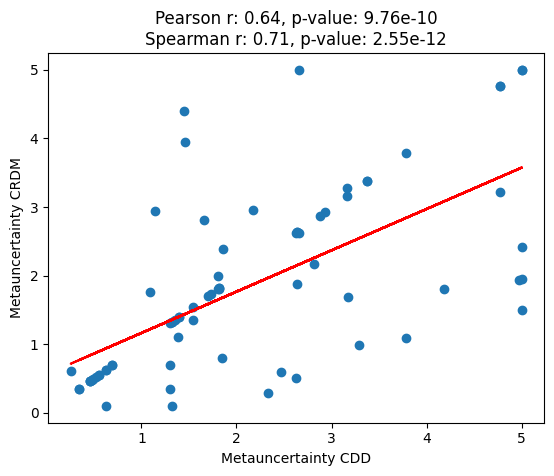

In [99]:
x = df_cdd_batches['meta_uncertainty']
y = df_crdm_batches['meta_uncertainty']
plt.scatter(x, y)
plt.xlabel("Metauncertainty CDD")
plt.ylabel("Metauncertainty CRDM")
corr = compute_correlations(x, y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b,"r-")
plt.title(f"Pearson r: {corr['Pearson']['r']:.2f}, p-value: {corr['Pearson']['p-value']:.2e}\nSpearman r: {corr['Spearman']['r']:.2f}, p-value: {corr['Spearman']['p-value']:.2e}")

1x1 plot of CRDM Meta-Uncertainty versus the Beta parameter (ambiguity aversion)

Text(0.5, 1.0, 'Pearson r: -0.08, p-value: 5.12e-01\nSpearman r: -0.03, p-value: 8.19e-01')

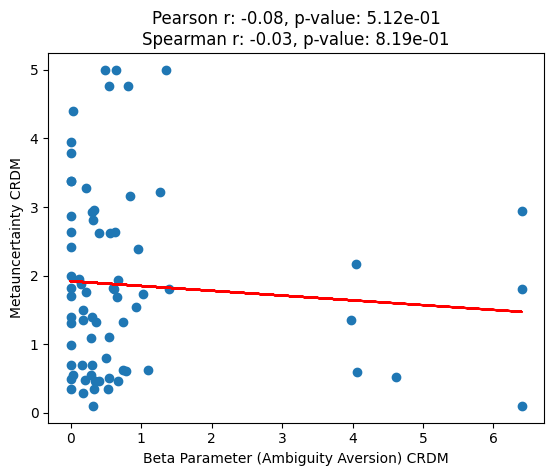

In [100]:
x = df_total_CRDM_analysis['beta']
y = df_crdm_batches['meta_uncertainty']
plt.scatter(x, y)
plt.xlabel("Beta Parameter (Ambiguity Aversion) CRDM")
plt.ylabel("Metauncertainty CRDM")
corr = compute_correlations(x, y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b,"r-")
plt.title(f"Pearson r: {corr['Pearson']['r']:.2f}, p-value: {corr['Pearson']['p-value']:.2e}\nSpearman r: {corr['Spearman']['r']:.2f}, p-value: {corr['Spearman']['p-value']:.2e}")